In [4]:
import pandas as pd
import numpy as np
import statistics as st
from sklearn.preprocessing  import MinMaxScaler
from sklearn.cluster  import KMeans
import re
import matplotlib.pyplot as plt
from pyts.approximation import PAA
from scipy.stats import norm
from pyts.quantization import SAX

In [17]:
class TS_SAX_PAA:

    def __init__(self):
        pass

    #read data and transoform
    def read_data(self , data):
        mms = MinMaxScaler()
        mms.fit(data)
        data_transformed = mms.transform(data)
        # print(data.head())
        # print(data_transformed)
        return data_transformed

    def find_value_of_k(self , data_transformed):
        Sum_of_squared_distances = []
        K = range(1,6)
        for k in K:
            print("k Value is ",k)
            km = KMeans(n_clusters=k)
            km = km.fit(data_transformed)
            Sum_of_squared_distances.append(km.inertia_)
            print(Sum_of_squared_distances)
        plt.plot(K, Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()

    def get_n_grams(self , ts1):

        ts1_ngrams = []

        for i in range(len(ts1) , 1 , -1):
        #     print(i)
            count= 0
            while(count+i <= len(ts1)):
                ts1_ngrams.append(ts1[count:count+i])
                count += 1
        return ts1_ngrams
    # print("patterns in time series one ",get_n_grams(ts1))

    def find_pattern(self , patterns , times_series):
        ts2 = "".join(times_series)
        for pattern in patterns:
            pattern = "".join(pattern)
            a = [m.start() for m in re.finditer(pattern,ts2)]
            if a :
                print(a)
                print("pattern found",pattern)

    #call find pattern
    def mean_absolute_percentage_error(self , y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def no_partitions(self , df):
        obj = TS_SAX_PAA()
        # df = pd.read_csv(r"D:\cloud_coe_work\esplus_timeseries\sumeet\cluster.csv", encoding='utf-8')
        print("df     ",df)

        # In[135]:
        df['MA_2']=df.rolling(window=2).mean()
        df['MA_3']=df['Price'].rolling(window=3).mean()
        df['MA_4']=df['Price'].rolling(window=4).mean()
        # print(df)
        df.plot(color='green' , figsize=(8,4),label='Price')
        df['MA_2'].plot(color='red' ,label='MA_2')
        df['MA_3'].plot(color='black' ,label='MA_3')
        df['MA_4'].plot(color='orange' ,label='MA_4')
        # pyplt.legend()
        split_point = len(df)- 3
        train, validation = df[0:split_point], df[split_point:]
        print('train %d, Validation %d' % (len(train), len(validation)))
        # base = validation['Price ']
        # return(base)
        y_true = validation['Price']
        y_pred_two=validation['MA_2']
        y_pred_three=validation['MA_3']
        y_pred_four=validation['MA_4']
        mape_avg2 = obj.mean_absolute_percentage_error(y_true, y_pred_two)
        mape_avg3 = obj.mean_absolute_percentage_error(y_true, y_pred_three)
        mape_avg4 = obj.mean_absolute_percentage_error(y_true, y_pred_four)
        print(mape_avg2)
        print(mape_avg3)
        print(mape_avg4)
        if min( mape_avg2 , mape_avg3 , mape_avg4 ) > 0:
            method= min( mape_avg2 , mape_avg3 , mape_avg4 )
            ma_index =  [mape_avg2 , mape_avg3 , mape_avg4].index(method ) + 2
            print("moving avg index : ",ma_index)
        # ma_index = 4
        return ma_index

    # def get_PAA(n_bins , data):
    #     partition = int(len(data) / n_bins)
    #     avg = []
    #     while(part+partition < = len(data)):
    #         pass


    def get_PAA(self , window_size , X):
        paa = PAA(window_size=window_size)
        print("length of x : ",len(X))
        X = [[i[0] for i in X]]
        print("inside PAA function")
        print(X)
        X_paa = paa.transform(X)
        n_features   = len(X)
        print("len of paa ",len(X_paa))
        # Show the results for the first time series
#         plt.figure(figsize=(12, 8))
#         plt.plot(np.arange(n_features), X, 'o-', label='Original')
#         plt.plot(np.arange(window_size // 2,
#                            n_features + window_size // 2,
#                            window_size), X_paa[0], 'o--', label='PAA')
#         plt.vlines(np.arange(0, n_features, window_size),
#                    np.min(X), np.max(X), color='r', linestyles='--', linewidth=0.5)
#         plt.legend(loc='best', fontsize=14)
#         plt.show()
#         return X_paa

    def get_SAX(self , X_paa , n_bins):
        sax = SAX(n_bins ,  quantiles= 'empirical')
        # print(sax.get_params)
        X_sax = sax.fit_transform(X_paa)
        print("SAX representation ",X_sax)
        return X_sax[0]

    # def get_PAA(self ,n_bins , data):
    #     part = 0
    #     partition = int(len(data) / n_bins)
    #     avg = []
    #     while(part+partition <= len(data)):
    #         print(data[part:part+partition])
    #         avg.append(st.median(data[part:part+partition]))
    #         part+= partition
    #     print("average " , avg )
    #     return avg


In [18]:
# if __name__ == '__main__':
#     obj = TS_SAX_PAA()
#     data = pd.read_csv(r"D:\cloud_coe_work\esplus_timeseries\sumeet\cluster.csv", encoding='utf-8')
#     data['Price '] = data['Price '].apply(lambda x : "".join( x.split(",")))
#     data["Price "] = pd.to_numeric(data['Price '])
#     data_t = obj.read_data(data)
#     obj.find_value_of_k(data_t)
#     partition = obj.no_partitions(data)
#     print("partition ",partition)
#     X_PAA = obj.get_PAA(int(partition) , data_t )
#     ts1 = obj.get_SAX(X_PAA , 3)
#     ts2= ts1

#     # ts1 = ['a','b', 'b' ,'a', 'c', 'c' ,'a']
#     # ts2 = ['b', 'a', 'c', 'a', 'b', 'c' , 'b' , 'a']
#     ngrams = obj.get_n_grams(ts1)
#     obj.find_pattern(ngrams , ts2)

    # obj.get_PAA(2 , [1,2,2,3,3,4,6,7,3,6])

k Value is  1
[354.0285080462519]
k Value is  2
[354.0285080462519, 107.92704435993491]
k Value is  3
[354.0285080462519, 107.92704435993491, 30.557877994752253]
k Value is  4
[354.0285080462519, 107.92704435993491, 30.557877994752253, 18.738626447908082]
k Value is  5
[354.0285080462519, 107.92704435993491, 30.557877994752253, 18.738626447908082, 9.80399194085528]


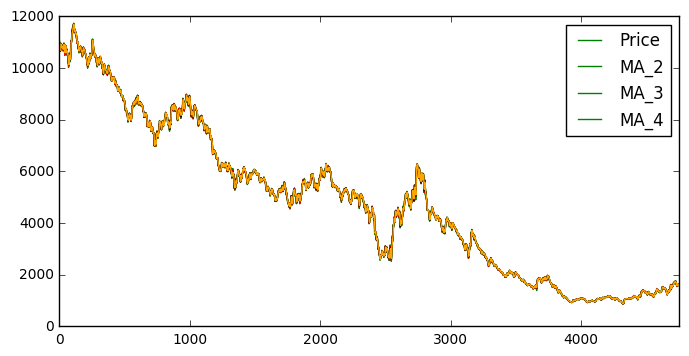

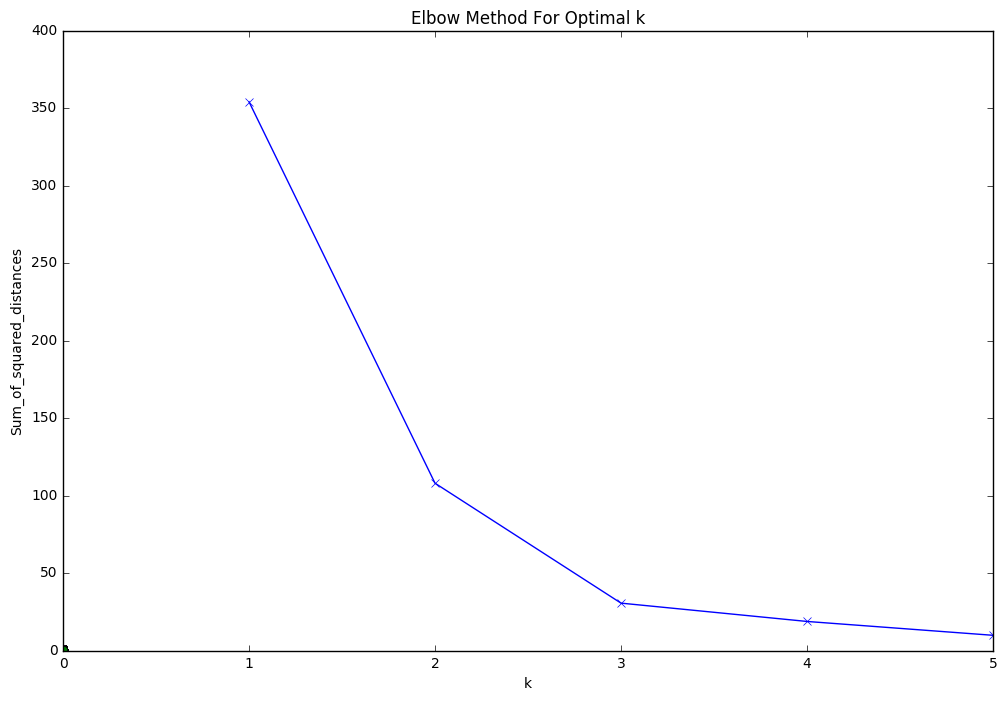

df      

c:\python35\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


         Price
0     11062.45
1     10934.35
2     10912.25
3     10893.65
4     10830.95
5     10651.80
6     10652.20
7     10661.55
8     10780.55
9     10849.80
10    10831.50
11    10922.75
12    10961.85
13    10906.95
14    10905.20
15    10890.30
16    10886.80
17    10737.60
18    10794.95
19    10821.60
20    10855.15
21    10802.15
22    10771.80
23    10727.35
24    10672.25
25    10792.50
26    10910.10
27    10862.55
28    10859.90
29    10779.80
...        ...
4725   1744.50
4726   1756.00
4727   1711.20
4728   1689.65
4729   1662.75
4730   1636.60
4731   1599.75
4732   1597.90
4733   1588.00
4734   1549.50
4735   1546.20
4736   1599.10
4737   1603.90
4738   1586.40
4739   1613.60
4740   1620.60
4741   1601.10
4742   1634.85
4743   1606.70
4744   1611.60
4745   1622.75
4746   1621.40
4747   1624.80
4748   1572.50
4749   1632.95
4750   1613.30
4751   1617.60
4752   1595.80
4753   1638.70
4754   1592.20

[4755 rows x 1 columns]
train 4752, Validation 3
1.1507503662799479
1

c:\python35\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python35\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
if __name__ == '__main__':
    obj = TS_SAX_PAA()
    data = pd.read_csv(r"D:\cloud_coe_work\esplus_timeseries\Nifty_50_historical_data.csv", encoding='utf-8')
    data['Price'] = data['Price'].apply(lambda x : "".join( x.split(",")))
    data["Price"] = pd.to_numeric(data['Price'])
    data = data.drop(['Date','Open','High','Low' , 'Vol.' , 'Change %'] , axis = 1)
    data_t = obj.read_data(data[:])
    data_t =[i for i in data_t]
#     print(data_t)
    obj.find_value_of_k(data_t)
    partition = obj.no_partitions(data[:])
    print("partition ",partition)
    X_PAA = obj.get_PAA(int(partition) , data_t )
    print("PAA ",X_PAA)
    ts1 = obj.get_SAX(X_PAA , 3)

#     data_t = obj.read_data(data[90:120])
#     # data_t =[[i] for i in data_t]
#     obj.find_value_of_k(data_t)
#     partition = obj.no_partitions(data[90:120])
#     print("partition ",partition)
#     X_PAA = obj.get_PAA(int(partition) , data_t )
#     print("PAA ",X_PAA)
#     ts2 = obj.get_SAX(X_PAA , 3)
# #     ts2= ts1

    # ts1 = ['a','b', 'b' ,'a', 'c', 'c' ,'a']
    # ts2 = ['b', 'a', 'c', 'a', 'b', 'c' , 'b' , 'a']
#     ngrams = obj.get_n_grams(ts1)
#     obj.find_pattern(ngrams , ts2)

In [5]:
a = [0.84402776 ,0.61159138 ,0.21812979 ,0.01235846 ,0.39784488 ,0.54870328 ,0.68817728 ,0.59892853 ,0.39060027 ,0.38104225 ,0.43065871 ,0.23809814 ,0.19621332 ,0.57110678 ,0.40922927 ]
# b = [0.4348439  ,0.76098987 ,0.93881174 ,0.74856427 ,0.57664195 ,0.06338102 ,0.33199332 ,0.7053357  ,0.8182103  ,0.63762138 ,0.35219797 ,0.15652083 ,0.46225332 ,0.3362222  ,0.18993422]
# b = [0.51487274,0.54627926,0.51977921,0.36136666,0.19894204,0.0485025 ,0.1592303 ,0.24982112,0.49974445,0.47275887,0.3244148 ,0.30108351,0.43734028,0.92331085,0.94449555]
b = [0.08059914,0.32600614,0.58818571,0.61059958,0.70546406,0.88075477,0.95973285,0.78180521,0.65073704,0.56981369]


a1 = ['c','c','a','a','b','b','c','c','b','a','b','a','a','c','b']
# b1 = ['b','c','c','c','b','a','a','c','c','b','b','a','b','a','a']
# b1 = ['c','c','c','b','a','a','a','a','b','b','b','a','b','c','c']
b1 = ['a','a','b','b','c','c','c','c','b','a']
# plt.plot(a)
# plt.plot(b)
# plt.show()
y = [i for i in range(15)]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(y , a)
for xy in zip(y, a):                                       # <--
    ax.annotate('%s' % a1[xy[0]], xy=xy, textcoords='data') # <--
# plt.show()

fig = plt.figure()
plt.plot(y[:10] , b)
ax1 = fig.add_subplot(111)
for xy in zip(y[:10], b):                                       # <--
    ax1.annotate('%s' % b1[xy[0]], xy=xy, textcoords='data') # <--
# plt.show()

In [7]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

a1 = ['c','c','a','a','b','b','c','c','b','a','b','a','a','c','b']
b1 = ['b','c','c','c','b','a','a','c','c','b','b','a','b','a','a']
b2 = ['c','c','c','b','a','a','a','a','b','b','b','a','b','c','c']
b3 = ['a','a','b','b','c','c','c','c','b','a']
# Define two sequences to be aligned
X = "ccaabbccbabaacb"
Y = "bcccbaaccbbabaa"

Z = X

alignments_max = pairwise2.align.globalms(X, Z, 2, -1, -0.5, -0.1)
for max_point in alignments_max:
    print(format_alignment(*max_point))

max_value = (alignments_max)[0][2]
array_ = [a1 , b1 , b2 , b3]
for i in range(len(array_)):
    for j in range(i+1 , len(array_)):
        X= "".join(array_[i])
        print("----"*20)
        print("series : " , Y)
        Y = "".join(array_[j])
        alignments = pairwise2.align.globalms(X, Y, 2, -1, -0.5, -0.1)
        for a in alignments:
            print(format_alignment(*a))
        cal_value = (alignments)[0][2]
        percentage_match =  cal_value/max_value
        print(percentage_match)
        print("Total percentage of Matching String :", percentage_match*100)

ccaabbccbabaacb
|||||||||||||||
ccaabbccbabaacb
  Score=30

--------------------------------------------------------------------------------
series :  bcccbaaccbbabaa
--cc-aabbccb-abaacb
  || ||  ||| ||||  
bcccbaa--ccbbabaa--
  Score=19.2

-cc--aabbccb-abaacb
 ||  ||  ||| ||||  
bcccbaa--ccbbabaa--
  Score=19.2

--cc-aabbcc-babaacb
  || ||  || |||||  
bcccbaa--ccbbabaa--
  Score=19.2

-cc--aabbcc-babaacb
 ||  ||  || |||||  
bcccbaa--ccbbabaa--
  Score=19.2

0.64
Total percentage of Matching String : 64.0
--------------------------------------------------------------------------------
series :  bcccbaaccbbabaa
cc----aabbccbabaacb-
||    ||||  |||  |  
cccbaaaabb--bab--c-c
  Score=17

cc----aabbccbabaacb
||    ||||  |||  |.
cccbaaaabb--bab--cc
  Score=17

cc----aabbccbabaa-cb
||    ||||  |||   | 
cccbaaaabb--bab--cc-
  Score=17

0.5666666666666667
Total percentage of Matching String : 56.666666666666664
--------------------------------------------------------------------------------
ser